#  `satn_to_panels` 

Produces a set of images with each panel containing one saturation. This method can be applied for visualizing image-based invasion percolation algorithm `ibip filter`.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

ps.visualization.set_mpl_style()

## `im`

The input image is a Boolean image `True` values indicating the void voxels and `False` for solid. Let's create a test image:

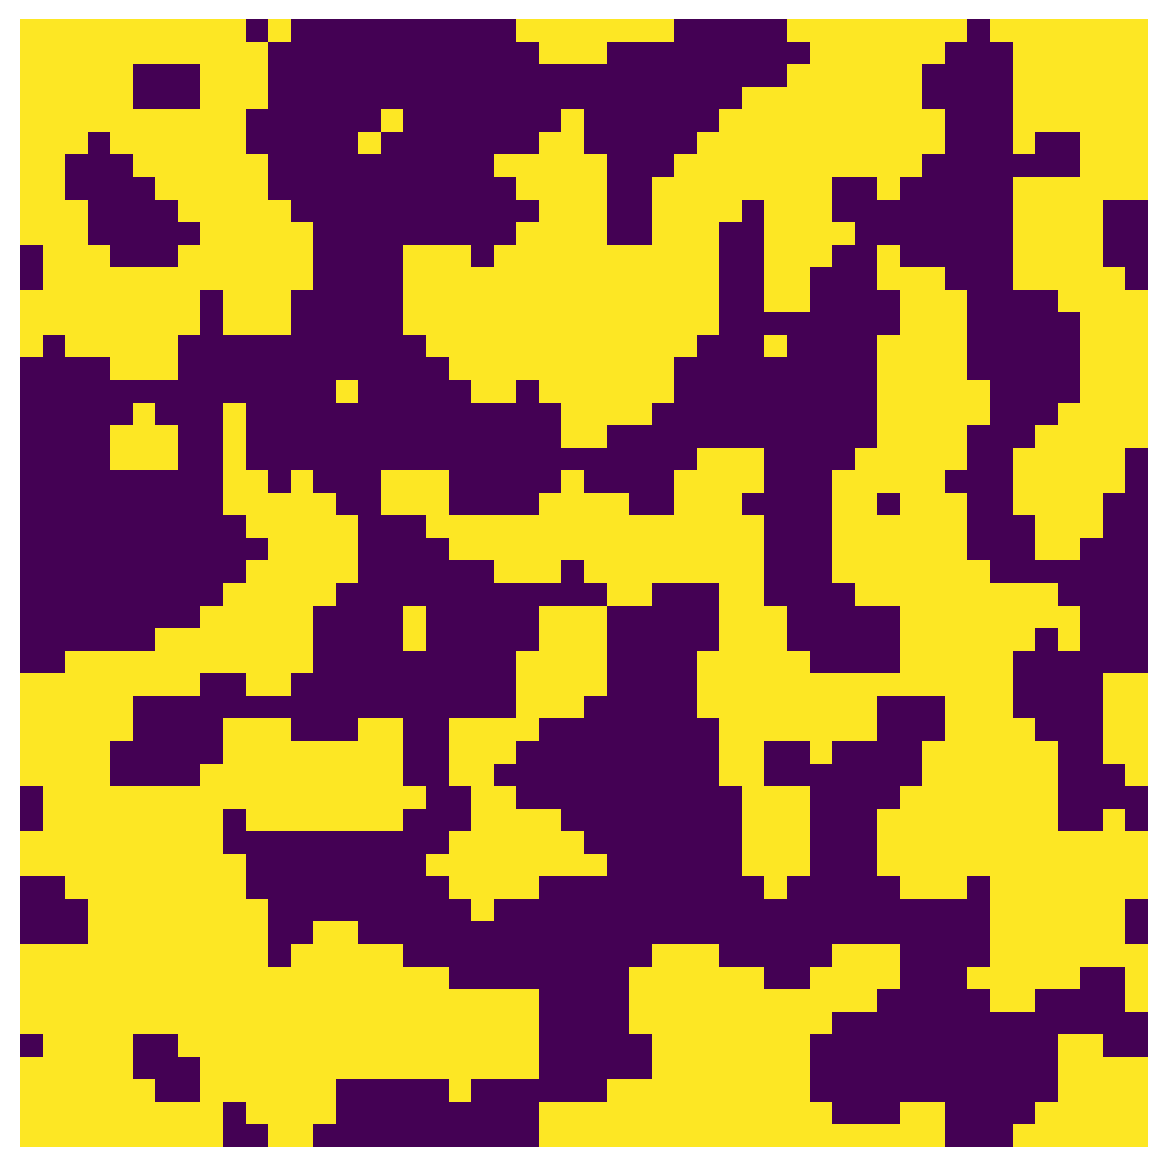

In [6]:
np.random.seed(10)
im = ps.generators.blobs(shape=[50, 50, 50])
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(im[:, :, 20], origin='lower', interpolation='none')
ax.axis(False);

## `satn`

The saturation image can be generated from any of the image-based invasion simulations, like `ibip` or `ibop`, the the result can be converted to saturaiton using `seq_to_satn`. The `satn` is the image of porous material where each voxel indicates the global saturation at which it was invaded. Voxels with 0 values indicate solid and and -1 indicate uninvaded. As the image is large, we will be visualizing a section of the image: Note that the regions that were uninvaded at sat=0.7 are now invaded at sat=0.75 and remaining regions are invaded at sat=1:

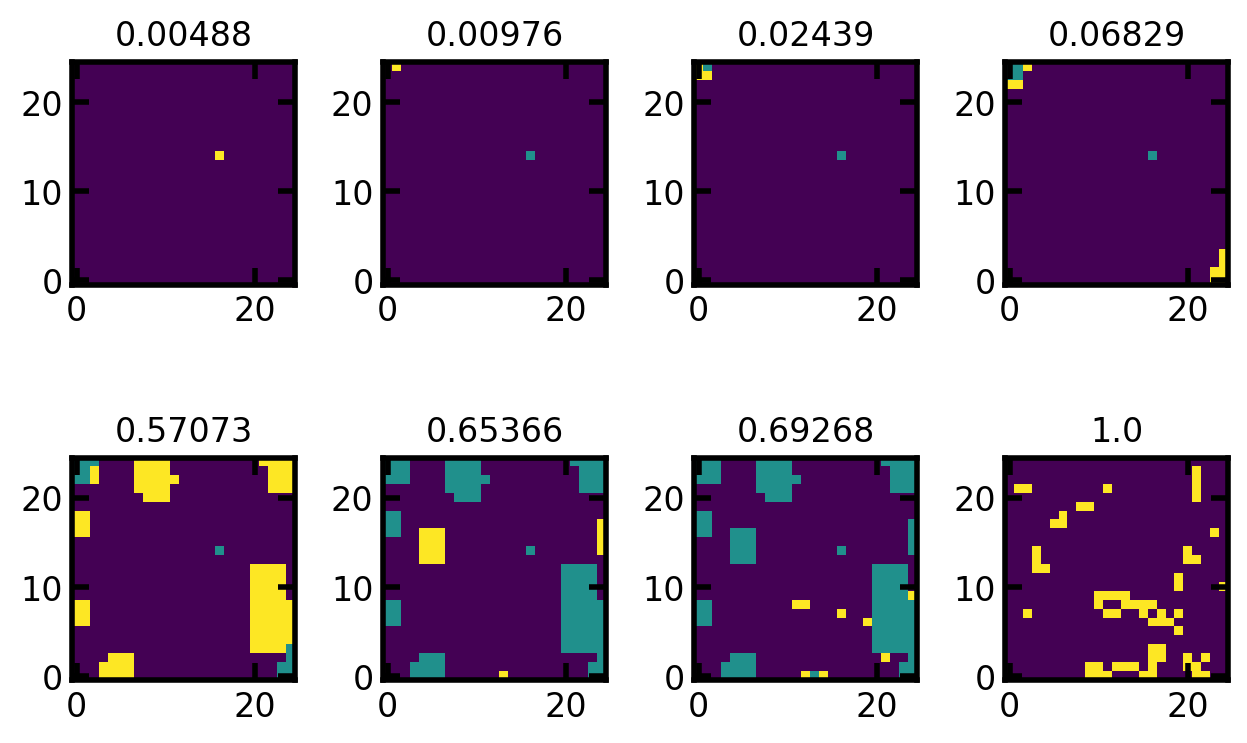

In [7]:
out = ps.simulations.drainage(im=im)
inv_seq, inv_size = out.im_seq, out.im_size
satn = ps.filters.seq_to_satn(seq=inv_seq, im=im)
fig, ax = ps.visualization.satn_to_panels(satn[:25, :25, 10], im[:25, :25, 10]);

## `bins`

Indicates for which saturations images should be made. By default all saturation values in the image are used. To visualize the image for a list of equally space values between 0 and 1, an `int` value can be passed as the input (the number of saturation points between [0,1]).

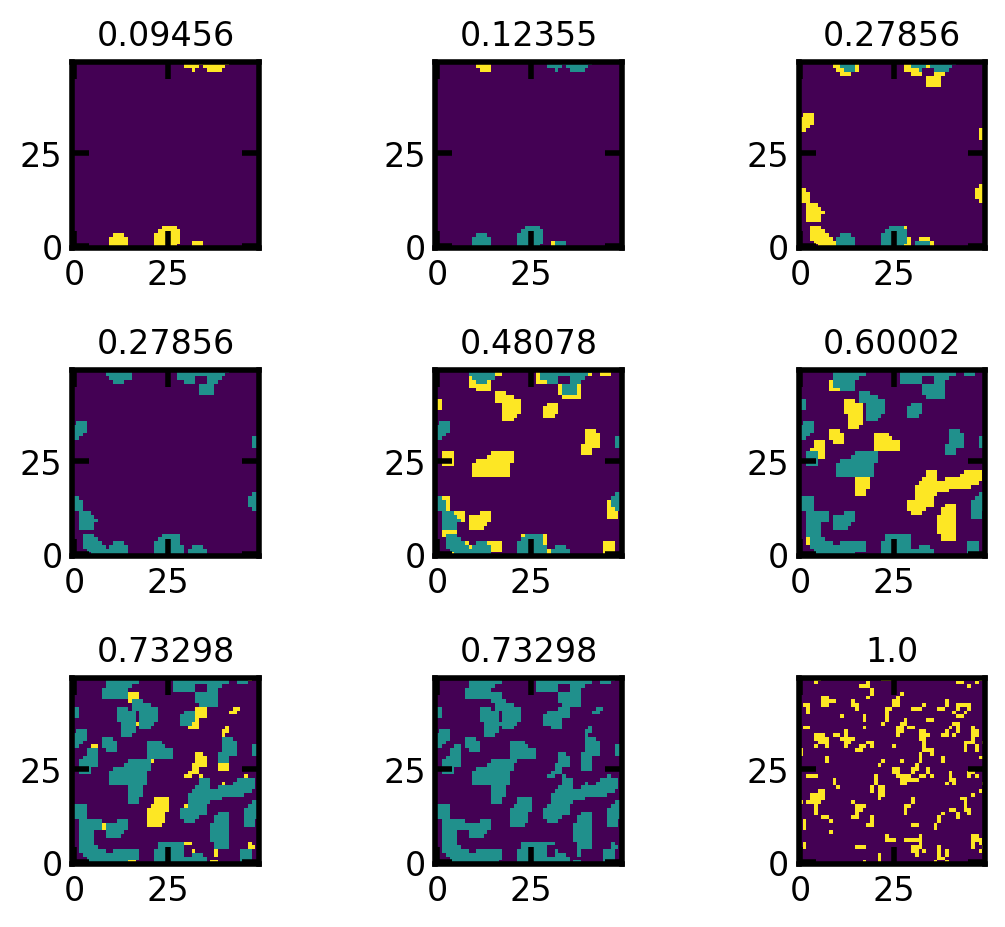

In [8]:
fig, ax = ps.visualization.satn_to_panels(satn, im, bins=9);

## `axis`

If the image is 2D this variable is ignored. If the image is 3D, a 2D image is extracted at the specified `slice` taken along this axis. By default axis=0 indicating the slice is extracted at x axis. Let's extract the slices at y axis (because `slice` is not passed as the input, the default slice is at the mid-point of the axis):

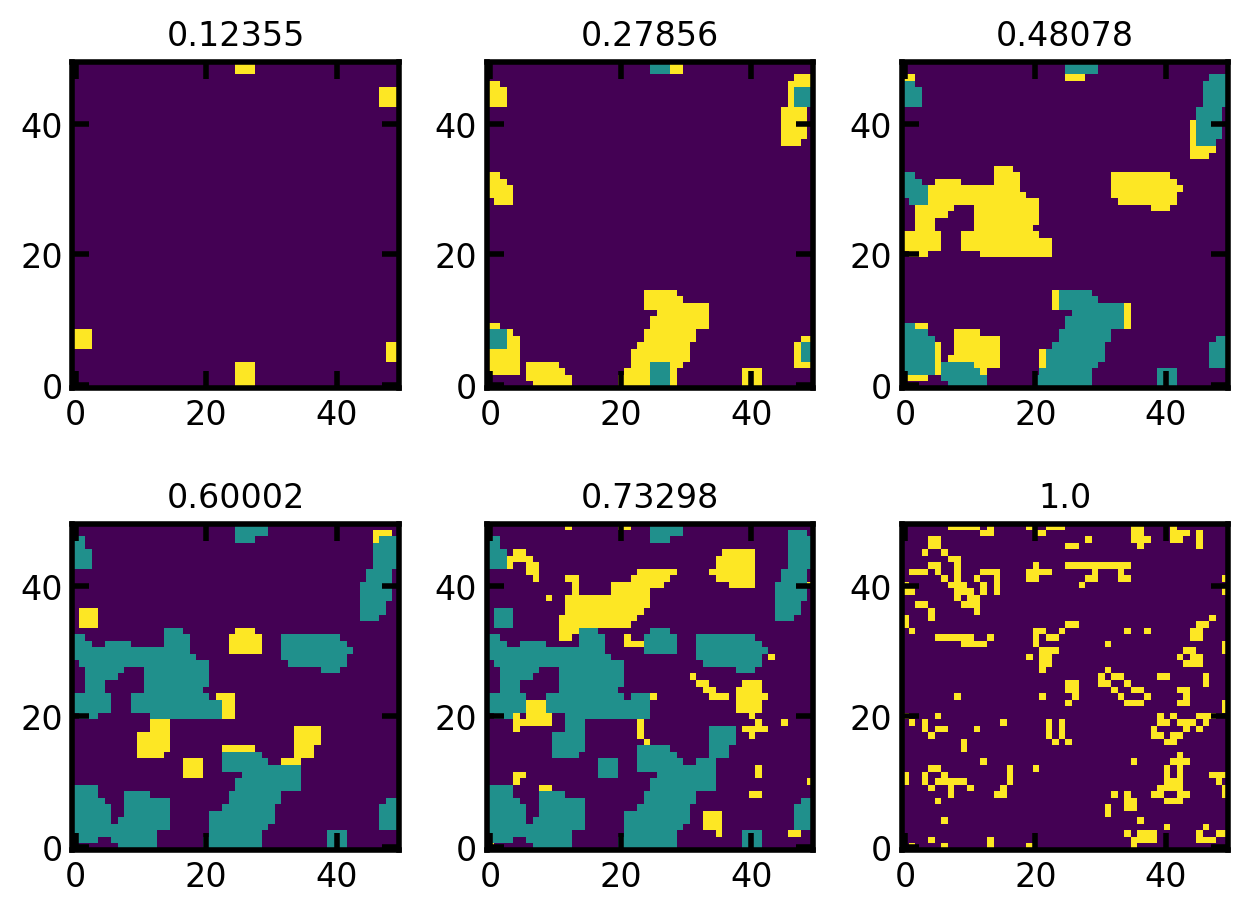

In [9]:
fig, ax = ps.visualization.satn_to_panels(satn, im, bins=6, axis=1);

## `slice`

If the image is 2D this variable is ignored. If the image is 3D, a 2D image is extracted from this slice along the given `axis`. By default a slice at the mid-point of the `axis` is returned. Let's extract a slice at y=4:

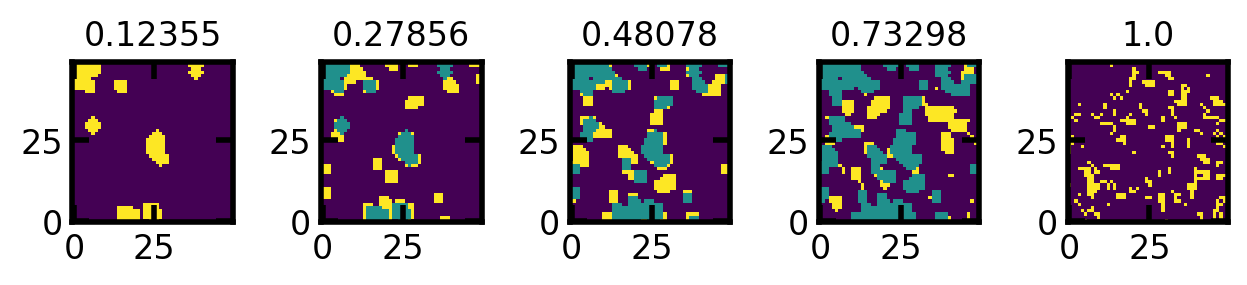

In [10]:
fig, ax = ps.visualization.satn_to_panels(satn, im, bins=5, axis=1, slice=4);

Note that extracting a slice at y=25 gives the same output as we have seen in the `axis` example above (default slice at mid-point axis):

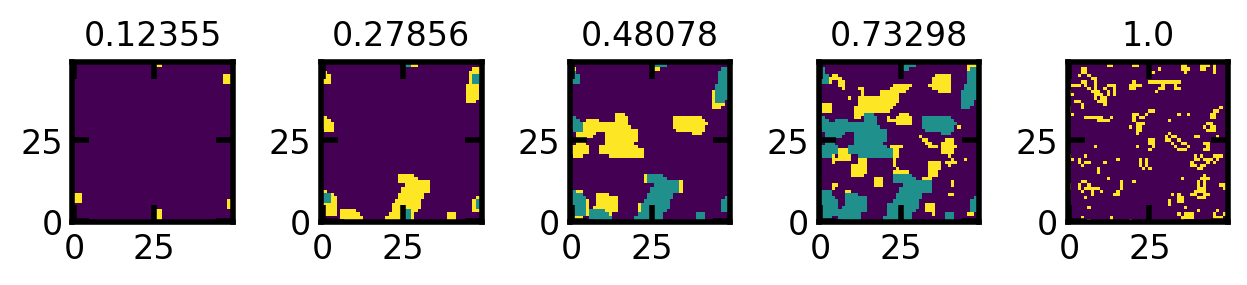

In [11]:
fig, ax = ps.visualization.satn_to_panels(satn, im, bins=5, axis=1, slice=25);

## `**kwargs`

Additional keyword arguments can be sent to the `imshow` function, such as `interpolation`.

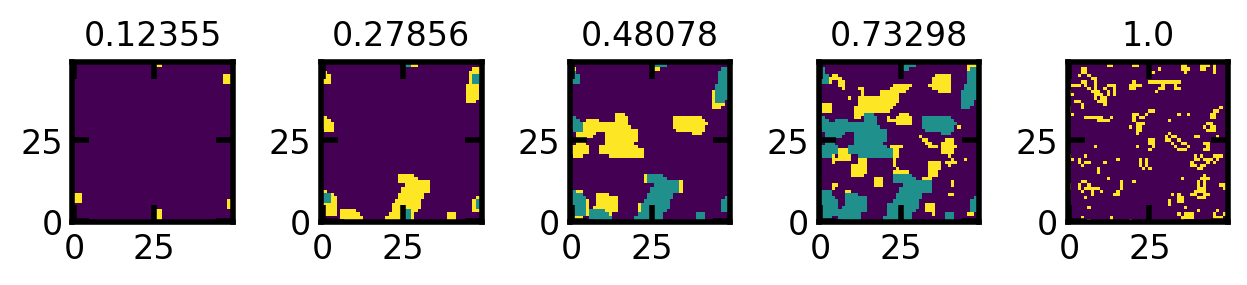

In [12]:
fig, ax = ps.visualization.satn_to_panels(satn, im, bins=5, axis=1, slice=25, interpolation=None);